<a href="https://colab.research.google.com/github/Mac1211/Project/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
data = pd.read_csv('/content/1- mental-illnesses-prevalence.csv')

In [ ]:
data.head()

In [ ]:
# Select the target variable and features
target = 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'
features = ['Year']

In [ ]:
# Preprocess the data
data = data.dropna()

In [ ]:
# Check if 'Entity' column exists in the DataFrame
if 'Entity' in data.columns:
    features.append('Entity')  # Add 'Entity' to features if it exists

In [ ]:
# Select features and target variable
X = data[features]
y = data[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
# Print the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: -0.009824379401865313
Mean Absolute Error (MAE): 0.03033769024095217
Mean Squared Error (MSE): 0.0016779929393484683
Root Mean Squared Error (RMSE): 0.04096331211399377


In [ ]:
data1= pd.read_csv('/content/1- mental-illnesses-prevalence.csv')

In [ ]:
data1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [ ]:
# Select relevant features for clustering
features = ['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
            'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [ ]:
# Preprocess the data
data = data[features].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

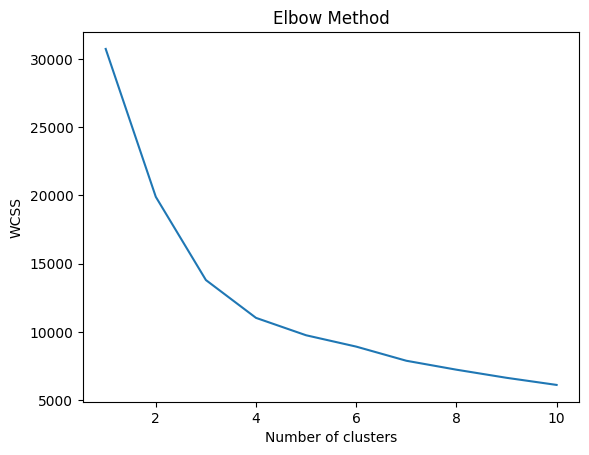

In [ ]:
# Determine the optimal number of clusters (using the elbow method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-Means clustering
num_clusters = 4  # Choose the optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [ ]:
# Print the cluster centroids
print("Cluster Centroids:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=features).to_string())

Cluster Centroids:
   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0                                                                           1.004041                                                                        0.264247                                                                     1.873948                                                                     1.116838                                                                    1.889001
1                                                                           0.491173                                                                       -0.739227                           